In [1]:
import numpy as np 
import numpy
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import os 
import tensorflow as tf 
from platform import python_version

# from tensorflow.keras.tf.data import Dataset

In [2]:
os.getcwd()


'C:\\Users\\user2\\Desktop\\notebooks_jp\\JunkNotebooks'

In [2]:
print(tf.__version__), print(python_version())

2.3.1
3.8.3


(None, None)

In [3]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [5]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

# print("Layer weights {}".format(l0.get_weights()))


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>


In [6]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


# plt.figure(figsize=(10, 6))

# plot_series(time_valid, x_valid)
# plot_series(time_valid, results)

In [7]:
# forecast = []
x_train_2 = x_train
for time in range(2000):
    bos=(model.predict(x_train_2[time:time + window_size][np.newaxis]))
    x_train_2=np.append(x_train_2,bos)
# forecast = forecast[split_time-window_size:]
# results = np.array(forecast)[:, 0, 0]


# plt.figure(figsize=(10, 6))

# plot_series(time_valid, x_valid)
# plot_series(time_valid, results)

In [8]:
# tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

In [9]:
len(series) , len(x_train)

(1461, 1000)

In [10]:
len(forecast)

461

In [11]:
deneme = series[3:3+window_size]

In [12]:
model.predict(deneme[np.newaxis])

array([[49.793343]], dtype=float32)

In [13]:
len(x_train)

1000

In [14]:
pre_interval = np.array(x_train[980-2:1000-2])

In [15]:
model.predict(pre_interval[np.newaxis])

array([[68.2189]], dtype=float32)

slider = 20
# bos  = []
# tot = []
for i in range(1,30):
    
    bos=(model.predict(pre_interval[i:i+slider][np.newaxis]))[0][0]
#     (pre_interval[i+slider]).append(bos)
    numpy.append(pre_interval,bos)

plt.grid(True)
plt.plot(series)
plt.plot(x_train_2)

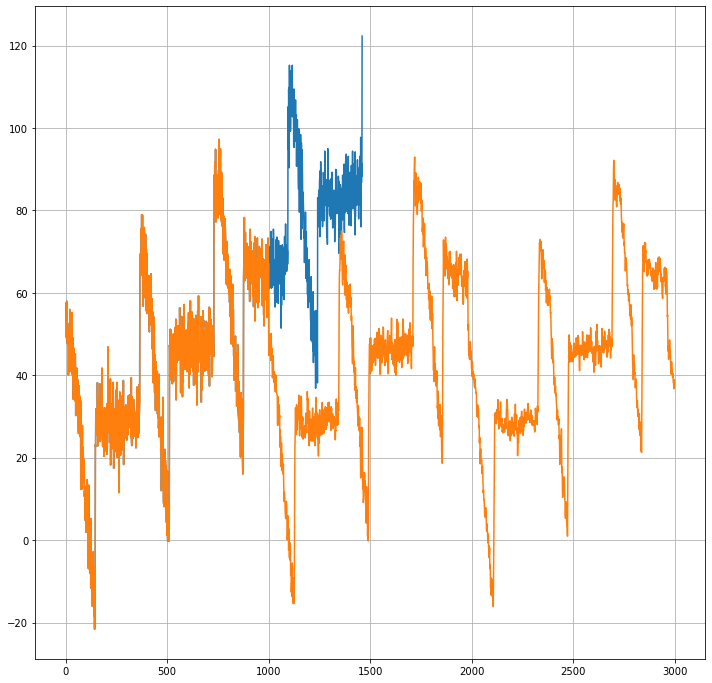

In [16]:
plt.figure(figsize = (12,12))
plt.grid(True)
plt.plot(series)
plt.plot(x_train_2)
# plt.xlim([400,1500])
# plt.ylim([0,300])

data_2="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall" 

corpus2 = data_2.lower().split("\n")

total_seq = []
for i in corpus2:
#     print(i.split())
    x = (len(i.split()))
    for j in range(x):
        print(i.split()[:j+1])
        total_seq.append((i.split()[:j+1]))